# Análisis de Datos de Fraude en Seguros de Auto

## 2. Procesamiento de los Datos

### 2.1 Carga de Librerías

In [1]:
# Cargamos las librerías a utilizar
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Para mostrar todas las columnas
pd.set_option('display.max_columns', None)

# Para mostar las cifras en formato float
pd.options.display.float_format = '{:.2f}'.format

### 2.2 Carga de Datos

In [2]:
# Asignamos los datos a un dataframe
car_fraud = pd.read_csv('.\..\data\Dataset.csv')

# Mostramos el encabezado de los datos
car_fraud.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,ClaimSize
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21.00,Policy Holder,Sport - Liability,Sport,more than 69000,0,1,12,300,1.00,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,55526.07
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34.00,Policy Holder,Sport - Collision,Sport,more than 69000,0,2,15,400,4.00,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,59294.46
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47.00,Policy Holder,Sport - Collision,Sport,more than 69000,0,3,7,400,3.00,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,71756.94
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65.00,Third Party,Sedan - Liability,Sport,20000 to 29000,0,4,4,400,2.00,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,7584.15
4,Feb,1,Saturday,Honda,Urban,Monday,Feb,3,Male,Married,36.00,Third Party,Sport - Collision,Sport,more than 69000,0,7,14,400,1.00,more than 30,more than 30,1,7 years,36 to 40,No,No,External,1 to 2,no change,1 vehicle,1994,Collision,98545.37


### 2.3 Limpieza de Datos

In [3]:
# Mostramos la suma de valores nulos

car_fraud.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     5
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            6
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
ClaimSize               0
dtype: int64

In [4]:
# Imputamos los valores nulos
# Esto también se puede realizar con pipeline SimpleImputer o KNNImputer

median_age = car_fraud['Age'].median()
car_fraud['Age'] = car_fraud['Age'].fillna(median_age)
median_DR = car_fraud['DriverRating'].median()
car_fraud['DriverRating'] = car_fraud['DriverRating'].fillna(median_DR)
car_fraud.isnull().any()

Month                   False
WeekOfMonth             False
DayOfWeek               False
Make                    False
AccidentArea            False
DayOfWeekClaimed        False
MonthClaimed            False
WeekOfMonthClaimed      False
Sex                     False
MaritalStatus           False
Age                     False
Fault                   False
PolicyType              False
VehicleCategory         False
VehiclePrice            False
FraudFound_P            False
PolicyNumber            False
RepNumber               False
Deductible              False
DriverRating            False
Days_Policy_Accident    False
Days_Policy_Claim       False
PastNumberOfClaims      False
AgeOfVehicle            False
AgeOfPolicyHolder       False
PoliceReportFiled       False
WitnessPresent          False
AgentType               False
NumberOfSuppliments     False
AddressChange_Claim     False
NumberOfCars            False
Year                    False
BasePolicy              False
ClaimSize 

In [5]:
# Reemplazamos los valores iguales a cero

car_fraud['DayOfWeekClaimed'] = car_fraud['DayOfWeekClaimed'].replace('0', 'Monday')
car_fraud['MonthClaimed'] = car_fraud['MonthClaimed'].replace('0', 'Jan')

car_fraud['Age'] = car_fraud['Age'].replace(0, median_age)

mean_ClaimSize = car_fraud['ClaimSize'].mean()
car_fraud['ClaimSize'] = car_fraud['ClaimSize'].replace(0, mean_ClaimSize)

print(car_fraud.groupby('DayOfWeekClaimed').size())
print(car_fraud.groupby('MonthClaimed').size())
print(car_fraud.groupby('Age').size())
print(car_fraud.groupby('ClaimSize').size())

DayOfWeekClaimed
Friday       1842
Monday       2812
Saturday       94
Sunday         40
Thursday     2000
Tuesday      2545
Wednesday    2232
dtype: int64
MonthClaimed
Apr     970
Aug     846
Dec     879
Feb     955
Jan    1085
Jul     908
Jun     967
Mar    1005
May    1038
Nov     973
Oct     995
Sep     944
dtype: int64
Age
16.00     8
17.00     5
18.00    34
19.00    24
20.00    15
         ..
76.00    32
77.00    20
78.00    26
79.00    12
80.00    25
Length: 65, dtype: int64
ClaimSize
504.58       4
512.67       1
532.51       1
538.14       5
542.63       2
            ..
100701.44    1
103375.05    1
103420.79    1
104194.70    1
141394.16    1
Length: 3332, dtype: int64


In [6]:
# Validamos el número de filas y columnas

car_fraud.shape

(11565, 34)

### 2.4 División de los Datos

In [7]:
# Dividimos los datos en X y y
X = car_fraud.drop(['FraudFound_P', 'PolicyNumber'], axis = 1)
y = car_fraud['FraudFound_P']

print(f"X: {X.shape}")
print(f"y: {y.shape}")

X: (11565, 32)
y: (11565,)


In [8]:
# Dividimos los datos de entrenamiento y prueba

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=0) #,stratify=y

print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

X_train: (9252, 32)
X_test: (2313, 32)
y_train: (9252,)
y_test: (2313,)


### 2.5 Codificación de Datos Categóricos

In [9]:
# Ordenamos las variables categóricas ordinales y nominales

Month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
DayOfWeek = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
Make = ['Accura', 'BMW', 'Chevrolet', 'Dodge', 'Ferrari', 'Ford', 'Honda', 'Jaguar', 'Lexus', 'Mazda', 'Mecedes', 'Mercury', 'Nisson', 'Pontiac', 'Porche', 'Saab', 'Saturn', 'Toyota', 'VW']
AccidentArea = ['Rural', 'Urban']
DayOfWeekClaimed = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
MonthClaimed = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
Sex = ['Male', 'Female']
MaritalStatus = ['Single', 'Married', 'Widow', 'Divorced']
Fault = ['Policy Holder', 'Third Party']
PolicyType = ['Sport - Liability', 'Sport - Collision', 'Sedan - Liability', 'Sedan - All Perils', 'Sedan - Collision', 'Utility - Collision', 'Utility - Liability', 'Utility - All Perils', 'Sport - All Perils']
VehicleCategory = ['Sport', 'Sedan', 'Utility']
VehiclePrice = ['less than 20000', '20000 to 29000', '30000 to 39000', '40000 to 59000', '60000 to 69000', 'more than 69000']
Days_Policy_Accident = ['none', '1 to 7', '8 to 15', '15 to 30', 'more than 30']
Days_Policy_Claim = ['none', '8 to 15', '15 to 30', 'more than 30']
PastNumberOfClaims = ['none', '1', '2 to 4', 'more than 4']
AgeOfVehicle = ['new', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', 'more than 7']
AgeOfPolicyHolder = ['16 to 17', '18 to 20', '21 to 25', '26 to 30', '31 to 35', '36 to 40', '41 to 50', '51 to 65', 'over 65']
PoliceReportFiled = ['No', 'Yes']
WitnessPresent = ['No', 'Yes']
AgentType = ['External', 'Internal']
NumberOfSuppliments = ['none', '1 to 2', '3 to 5', 'more than 5']
AddressChange_Claim = ['no change', 'under 6 months', '1 year', '2 to 3 years', '4 to 8 years']
NumberOfCars = ['1 vehicle', '2 vehicles', '3 to 4', '5 to 8', 'more than 9']
BasePolicy = ['Liability', 'Collision', 'All Perils']

In [10]:
# Aplicamos el codificador OrdinalEncoder a las variables categóricas ordinales y nominales

from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder(categories = [Month,
                                  DayOfWeek,
                                  Make,
                                  AccidentArea,
                                  DayOfWeekClaimed,
                                  MonthClaimed,
                                  Sex,
                                  MaritalStatus,
                                  Fault,
                                  PolicyType,
                                  VehicleCategory,
                                  VehiclePrice,
                                  Days_Policy_Accident,
                                  Days_Policy_Claim,
                                  PastNumberOfClaims,
                                  AgeOfVehicle,
                                  AgeOfPolicyHolder,
                                  PoliceReportFiled,
                                  WitnessPresent,
                                  AgentType,
                                  NumberOfSuppliments,
                                  AddressChange_Claim,
                                  NumberOfCars,
                                  BasePolicy],
                    handle_unknown='use_encoded_value', unknown_value=-1)

### 2.6 Escalamiento de Variables

In [11]:
# Estandarizamos los datos númericos utilizando StandardScaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

### 2.7 Sesgo / Asimetría

In [12]:
# Calculamos el sesgo o asimietría de las variables numericas NO categóricas
# Inclinación positiva (derecha) o negativa (izquierda)
# Los valores más cercanos a cero tienen menos sesgo

car_fraud[['Age', 'ClaimSize']].skew()

Age         0.73
ClaimSize   1.19
dtype: float64

In [13]:
# Aplicamos la transformación de Box-Cox o Yeo-Johnson a los atributos con sesgo
# box-cox (valores positivos)
# yeo-johnson (valores negativos)

from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='box-cox', standardize=True)

### 2.8 Transformación de Columnas

In [14]:
# Aplicamos el transformador make_column_transformer

from sklearn.compose import make_column_transformer

ct = make_column_transformer(
    (oe, ['Month',
          'DayOfWeek',
          'Make',
          'AccidentArea',
          'DayOfWeekClaimed',
          'MonthClaimed',
          'Sex',
          'MaritalStatus',
          'Fault',
          'PolicyType',
          'VehicleCategory',
          'VehiclePrice',
          'Days_Policy_Accident',
          'Days_Policy_Claim',
          'PastNumberOfClaims',
          'AgeOfVehicle',
          'AgeOfPolicyHolder',
          'PoliceReportFiled',
          'WitnessPresent',
          'AgentType',
          'NumberOfSuppliments',
          'AddressChange_Claim',
          'NumberOfCars',
          'BasePolicy']),
    (scaler, ['WeekOfMonth',
              'WeekOfMonthClaimed',
              'RepNumber',
              'Deductible',
              'DriverRating',
              'Year',]),
    (pt, ['Age',
          'ClaimSize']),
     remainder = 'passthrough')

In [15]:
# Ajustamos y transformamos los datos de entrenamiento X_train

X_train = pd.DataFrame(ct.fit_transform(X_train),
                       columns = ['Month',
                                  'DayOfWeek',
                                  'Make',
                                  'AccidentArea',
                                  'DayOfWeekClaimed',
                                  'MonthClaimed',
                                  'Sex',
                                  'MaritalStatus',
                                  'Fault',
                                  'PolicyType',
                                  'VehicleCategory',
                                  'VehiclePrice',
                                  'Days_Policy_Accident',
                                  'Days_Policy_Claim',
                                  'PastNumberOfClaims',
                                  'AgeOfVehicle',
                                  'AgeOfPolicyHolder',
                                  'PoliceReportFiled',
                                  'WitnessPresent',
                                  'AgentType',
                                  'NumberOfSuppliments',
                                  'AddressChange_Claim',
                                  'NumberOfCars',
                                  'BasePolicy',
                                  'WeekOfMonth',
                                  'WeekOfMonthClaimed',
                                  'RepNumber',
                                  'Deductible',
                                  'DriverRating',
                                  'Year',
                                  'Age',
                                  'ClaimSize'])
X_train.shape

(9252, 32)

In [16]:
# Mostramos un encabezado de los datos

X_train.head().round(2)

,Month,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,Sex,MaritalStatus,Fault,PolicyType,VehicleCategory,VehiclePrice,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,BasePolicy,WeekOfMonth,WeekOfMonthClaimed,RepNumber,Deductible,DriverRating,Year,Age,ClaimSize
0,7.00,6.00,18.00,1.00,0.00,7.00,0.00,1.00,1.00,4.00,1.00,3.00,4.00,3.00,2.00,7.00,6.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.17,1.03,-0.53,-0.17,-1.33,-1.08,0.85,1.20
1,9.00,2.00,18.00,0.00,1.00,9.00,0.00,1.00,0.00,4.00,1.00,2.00,4.00,3.00,1.00,5.00,4.00,0.00,0.00,0.00,3.00,0.00,0.00,1.00,0.17,1.03,1.41,-0.17,1.34,0.17,-0.36,0.26
2,7.00,6.00,17.00,0.00,4.00,8.00,0.00,0.00,1.00,4.00,1.00,2.00,4.00,3.00,0.00,5.00,4.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.95,-1.35,0.33,-0.17,-0.44,1.42,-1.27,-0.65
3,8.00,4.00,9.00,1.00,5.00,9.00,0.00,1.00,0.00,2.00,0.00,0.00,4.00,3.00,2.00,6.00,5.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.17,-1.35,-0.75,-0.17,-0.44,1.42,0.10,-0.38
4,0.00,2.00,6.00,1.00,2.00,1.00,0.00,0.00,1.00,4.00,1.00,1.00,1.00,2.00,2.00,4.00,3.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.95,-1.35,1.63,-0.17,-0.44,0.17,-1.55,-1.40


In [18]:
# Transformamos los datos de prueba X_test

X_test = pd.DataFrame(ct.transform(X_test),
                       columns = ['Month',
                                  'DayOfWeek',
                                  'Make',
                                  'AccidentArea',
                                  'DayOfWeekClaimed',
                                  'MonthClaimed',
                                  'Sex',
                                  'MaritalStatus',
                                  'Fault',
                                  'PolicyType',
                                  'VehicleCategory',
                                  'VehiclePrice',
                                  'Days_Policy_Accident',
                                  'Days_Policy_Claim',
                                  'PastNumberOfClaims',
                                  'AgeOfVehicle',
                                  'AgeOfPolicyHolder',
                                  'PoliceReportFiled',
                                  'WitnessPresent',
                                  'AgentType',
                                  'NumberOfSuppliments',
                                  'AddressChange_Claim',
                                  'NumberOfCars',
                                  'BasePolicy',
                                  'WeekOfMonth',
                                  'WeekOfMonthClaimed',
                                  'RepNumber',
                                  'Deductible',
                                  'DriverRating',
                                  'Year',
                                  'Age',
                                  'ClaimSize'])
X_test.shape

(2313, 32)

In [19]:
# Mostramos un encabezado de los datos

X_test.head().round(2)

,Month,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,Sex,MaritalStatus,Fault,PolicyType,VehicleCategory,VehiclePrice,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,BasePolicy,WeekOfMonth,WeekOfMonthClaimed,RepNumber,Deductible,DriverRating,Year,Age,ClaimSize
0,3.00,3.00,13.00,1.00,3.00,3.00,0.00,1.00,0.00,2.00,0.00,2.00,4.00,3.00,1.00,7.00,6.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,0.17,0.24,-0.97,-0.17,-1.33,0.17,0.78,1.19
1,1.00,3.00,6.00,1.00,0.00,1.00,0.00,1.00,1.00,3.00,1.00,1.00,4.00,3.00,1.00,7.00,5.00,0.00,0.00,0.00,1.00,0.00,0.00,2.00,0.95,1.03,0.55,-0.17,-0.44,1.42,-0.07,-0.26
2,1.00,0.00,6.00,1.00,0.00,1.00,0.00,0.00,0.00,4.00,1.00,5.00,4.00,3.00,1.00,0.00,5.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.95,1.03,-1.62,-0.17,-1.33,1.42,0.01,1.24
3,1.00,4.00,9.00,1.00,1.00,2.00,0.00,1.00,1.00,4.00,1.00,1.00,4.00,3.00,2.00,5.00,4.00,0.00,0.00,0.00,3.00,0.00,0.00,1.00,0.95,-1.35,1.63,-0.17,-1.33,0.17,-1.41,-0.71
4,2.00,0.00,17.00,0.00,3.00,2.00,0.00,1.00,0.00,4.00,1.00,2.00,4.00,3.00,1.00,6.00,5.00,0.00,0.00,0.00,3.00,0.00,0.00,1.00,-1.39,-0.55,0.55,-0.17,-1.33,0.17,-0.07,1.18


### 2.9 Sobre muestreo de los datos

In [20]:
# Aplicamos sobre muestreo para balancear la clase usando SMOTE

#pip install imbalanced-learn

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=7)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Validamos el número de filas y columnas
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")

X_train: (17388, 32)
y_train: (17388,)


## 3. Modelado

### 3.1 Secuencial

In [181]:
# Definimos el modelo de capas con Keras relu - sigmoid (clasificación binaria)

#pip install tensorflow
#pip install keras

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

# Creamos 2 capas ocultas con 16 y 8 neuronas

model = Sequential()
#model.add(Dense(32, activation='relu')) # 1 capa oculta #input_dim=32
#model.add(Dropout(0.5))
model.add(Dense(16, input_dim=32, activation='relu')) # 2 capa oculta
model.add(Dropout(0.5))
model.add(Dense(8, activation='relu')) # 3 capa oculta*
model.add(Dropout(0.5))
model.add(Dense(4, activation='relu')) # 4 capa oculta*
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid')) # 1 capa de salida

In [182]:
# Compilamos el modelo Keras binary_crossentropy (clasificación binaria)

model.compile(loss='binary_crossentropy', optimizer='adam') #metrics=[tf.keras.metrics.Accuracy()]) #metrics=['Recall']

In [183]:
# Definimos el Callbacks EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=25)

In [184]:
# Ajustamos el modelo Keras en los datos de entrenamiento y validamos con los datos de prueba

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=64, callbacks=[early_stop]) #validation_split=0.3

Epoch 1/200
272/272 [==============================] - 1s 3ms/step - loss: 0.9469 - val_loss: 0.6950
Epoch 2/200
272/272 [==============================] - 1s 3ms/step - loss: 0.7076 - val_loss: 0.6994
Epoch 3/200
272/272 [==============================] - 1s 2ms/step - loss: 0.6953 - val_loss: 0.6967
Epoch 4/200
272/272 [==============================] - 1s 3ms/step - loss: 0.6943 - val_loss: 0.6975
Epoch 5/200
272/272 [==============================] - 1s 3ms/step - loss: 0.6929 - val_loss: 0.6985
Epoch 6/200
272/272 [==============================] - 1s 3ms/step - loss: 0.6920 - val_loss: 0.6990
Epoch 7/200
272/272 [==============================] - 1s 2ms/step - loss: 0.6919 - val_loss: 0.6969
Epoch 8/200
272/272 [==============================] - 1s 2ms/step - loss: 0.6896 - val_loss: 0.7014
Epoch 9/200
272/272 [==============================] - 1s 2ms/step - loss: 0.6852 - val_loss: 0.6953
Epoch 10/200
272/272 [==============================] - 1s 2ms/step - loss: 0.6806 - val_lo

<AxesSubplot:>

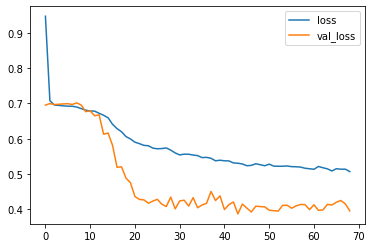

In [185]:
# Graficamos las pérdidas de los conjuntos de entrenamiento y validación

model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [186]:
# Evaluamos el modelo Keras de los estimadores

score = model.evaluate(X_train, y_train)
print('loss: %.2f' % (score*100))

544/544 [==============================] - 1s 1ms/step - loss: 0.4028
loss: 40.28


In [187]:
# Hacemos predicciones sobre los datos de prueba

y_pred = np.round(model.predict(X_test))
y_pred

73/73 [==============================] - 0s 1ms/step


array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [1.]], dtype=float32)

In [188]:
y_pred = pd.DataFrame(y_pred, columns = ['FraudFound_P'])
y_pred.head()

,FraudFound_P
0,0.00
1,0.00
2,0.00
3,0.00
4,1.00


### 3.2 Evaluación del modelo

In [189]:
# Obtenemos las princiales métricas de los predictores

from sklearn.metrics import accuracy_score, cohen_kappa_score, roc_auc_score

accuracy = accuracy_score(y_test, y_pred)
kappa = cohen_kappa_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy*100.0:,.2f}%")
print(f"Cohen Kappa: {kappa*100.0:,.2f}%")
print(f"AUC: {auc*100.0:,.2f}%")

Accuracy: 70.99%
Cohen Kappa: 14.21%
AUC: 73.16%


In [190]:
# Obtenemos el reporte de clasificación de los predictores

from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.71      0.82      2186
           1       0.13      0.76      0.22       127

    accuracy                           0.71      2313
   macro avg       0.56      0.73      0.52      2313
weighted avg       0.93      0.71      0.79      2313



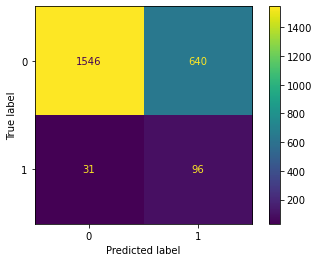

In [191]:
# Dibujamos la matriz de confusión de los predictores

from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()